Reference - https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [1]:
# importing basic libraries

import numpy as np

import pandas as pd

from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import test and train file

train = pd.read_csv('Train_bigmart.csv')

test = pd.read_csv('Test_bigmart.csv')


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [4]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
# importing linear regressionfrom sklearn

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

In [7]:
# splitting into training and cv for cross validation

X = train.loc[:, ['Outlet_Establishment_Year','Item_MRP']]

x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

In [8]:
X.head()

,Outlet_Establishment_Year,Item_MRP
0,1999,249.8092
1,2009,48.2692
2,1999,141.6180
3,1998,182.0950
4,1987,53.8614


In [9]:
# label feature

train.Item_Outlet_Sales.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [10]:
# training the model

lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
# predicting on cv

pred = lreg.predict(x_cv)

In [12]:
# calculating mse

mse = np.mean((pred - y_cv)**2)
print(mse)

1988253.103595472


## Calculating coefficients

In [13]:
coeff = DataFrame(x_train.columns)
coeff['Coefficient estimates'] = Series(lreg.coef_)
coeff

,0,Coefficient estimates
0,Outlet_Establishment_Year,-9.684831
1,Item_MRP,15.586075


MRP has highest coefficients, meaning items having higher prices has better sales

### R-Square 

In [14]:
lreg.score(x_cv, y_cv)

0.3277164083029038

In this case, R² is 31%, meaning, only 31% of variance in sales is explained by year of establishment and MRP. In other words, if you know year of establishment and the MRP, you’ll have 31% information to make an accurate prediction about its sales.

### Linear regression with more variables

So, let us introduce another feature ‘weight’. Now let’s build a regression model with these three features

In [15]:
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]

# splitting into training and cv for cross validation

x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

In [16]:
# training the model

lreg.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

ValueError: Input contains NaN, infinity or a value too large for dtype(‘float64’).

It produces an error, because item weights column have some missing values. So let us impute it with the mean of other non-null entries.

In [17]:
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)

In [18]:
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]

## splitting into training and cv for cross validation

x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

In [19]:
## training the model 

lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
# calculating mse

mse = np.mean((pred - y_cv)**2)
print(mse)

3949769.575824536


In [21]:
## calculating coefficients

coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)

coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-9.175427
1,Item_MRP,15.446879
2,Item_Weight,-1.362645


In [22]:
# calculating r-square

lreg.score(x_cv,y_cv)

0.33022606868790716

## Using all the features for prediction

In [23]:
# imputing missing values

train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))

train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']

train['Outlet_Size'].fillna('Small',inplace=True)

In [24]:
# creating dummy variables to convert categorical into numeric values

mylist = list(train.select_dtypes(include=['object']).columns)

dummies = pd.get_dummies(train[mylist], prefix= mylist)

train.drop(mylist, axis=1, inplace = True)

X = pd.concat([train,dummies], axis =1 )

In [25]:
print(mylist)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [26]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,14,3735.1380,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,4,443.4228,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,14,2097.2700,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.066132,182.0950,15,732.3800,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.93,0.066132,53.8614,26,994.7052,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [27]:
X = train.drop('Item_Outlet_Sales',1)

x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales, test_size =0.3)

In [28]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,14
1,5.92,0.019278,48.2692,4
2,17.50,0.016760,141.6180,14
3,19.20,0.066132,182.0950,15
4,8.93,0.066132,53.8614,26


In [29]:
# training a linear regression model on train

lreg.fit(x_train,y_train)

# predicting on cv

pred_cv = lreg.predict(x_cv)

# calculating mse

mse = np.mean((pred_cv - y_cv)**2)

mse

1902984.5139371627

In [30]:
# evaluation using r-square

lreg.score(x_cv,y_cv)

0.34936034962634965

## Selecting the right features for your model

Instead of manually selecting the variables, we can automate this process by using forward or backward selection. Forward selection starts with most significant predictor in the model and adds variable for each step. Backward elimination starts with all predictors in the model and removes the least significant variable for each step. Selecting criteria can be set to any statistical measure like R-square, t-stat etc.

### Interpretation of Regression Plots

Take a look at the residual vs fitted values plot.

Text(0.5, 1.0, 'Residual plot')

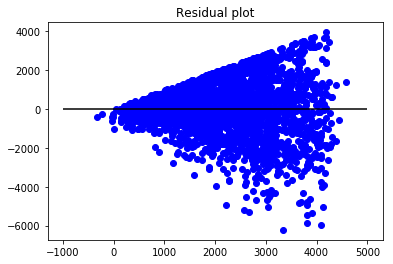

In [31]:
# residual plot

x_plot = plt.scatter(pred_cv, (pred_cv - y_cv), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

We can see a funnel like shape in the plot. This shape indicates Heteroskedasticity. The presence of non-constant variance in the error terms results in heteroskedasticity. We can clearly see that the variance of error terms(residuals) is not constant. Generally, non-constant variance arises in presence of outliers or extreme leverage values. These values get too much weight, thereby disproportionately influencing the model’s performance. When this phenomenon occurs, the confidence interval for out of sample prediction tends to be unrealistically wide or narrow.

## Regularisation

In regularization, what we do is normally we keep the same number of features, but reduce the magnitude of the coefficients j. How does reducing the coefficients will help us?

Let us take a look at the coefficients of feature in our above regression model.

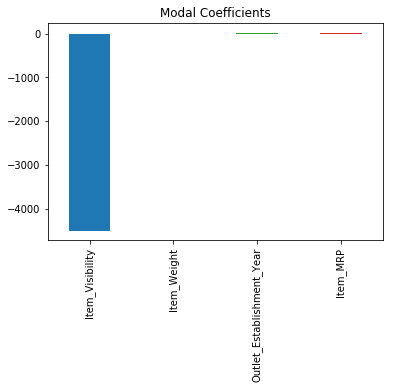

In [33]:
# checking the magnitude of coefficients

predictors = x_train.columns

coef = Series(lreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

## Ridge Regression

In [34]:
from sklearn.linear_model import Ridge

In [35]:
## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

In [36]:
# calculating mse

mse = np.mean((pred_cv - y_cv)**2)

mse

1902984.5139371627

In [37]:
## calculating score 

ridgeReg.score(x_cv,y_cv)

0.34803986703689105

## Lasso regression

LASSO (Least Absolute Shrinkage Selector Operator), is quite similar to ridge, but lets understand the difference them by implementing it in our big mart problem.

In [38]:
from sklearn.linear_model import Lasso

In [39]:
lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_cv)

In [40]:
# calculating mse

mse = np.mean((pred_cv - y_cv)**2)

mse

1902984.5139371627

In [41]:
# R-square

lassoReg.score(x_cv,y_cv)


0.3483226599919086

## Elastic Net Regression

hybrid of ridge and lasso regression

In [42]:
from sklearn.linear_model import ElasticNet

In [43]:
ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(x_train,y_train)

pred_cv = ENreg.predict(x_cv)

In [45]:
#calculating mse

mse = np.mean((pred_cv - y_cv)**2)

mse

1970237.3808886171

In [46]:
# R-Square

ENreg.score(x_cv,y_cv)

0.3263662676885039

So we get the value of R-Square, which is very less than both ridge and lasso. Can you think why? The reason behind this downfall is basically we didn’t have a large set of features. Elastic regression generally works well when we have a big dataset.